In [1]:
# data manipulation libraries
import pandas as pd
import numpy as np

# visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

In [2]:
users_data = pd.read_pickle("../data/users_data_final.pkl")

In [3]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45209 non-null  object        
 1   number_transactions  35210 non-null  float64       
 2   total_amount_usd     35210 non-null  float64       
 3   age                  45209 non-null  int64         
 4   job                  44921 non-null  object        
 5   marital              45209 non-null  object        
 6   education            43352 non-null  object        
 7   default              45209 non-null  bool          
 8   housing              45209 non-null  bool          
 9   loan                 45209 non-null  bool          
 10  contact              32191 non-null  object        
 11  duration             45209 non-null  int64         
 12  campaign             45209 non-null  int64         
 13  pdays                45209 non-

In [4]:
non_object_features = list(users_data.select_dtypes(['float64', 'int64', 'bool']).columns)

In [5]:
non_object_features

['number_transactions',
 'total_amount_usd',
 'age',
 'default',
 'housing',
 'loan',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit']

In [6]:
type(non_object_features)

list

In [7]:
len(non_object_features)

11

In [8]:
users_data.isnull().sum()

user_id                    0
number_transactions     9999
total_amount_usd        9999
age                        0
job                      288
marital                    0
education               1857
default                    0
housing                    0
loan                       0
contact                13018
duration                   0
campaign                   0
pdays                      0
previous                   0
poutcome               36957
term_deposit               0
date_joined               30
device                    94
dtype: int64

In [9]:
numerical_features = users_data.select_dtypes(['float64', 'int64', 'bool'])

In [10]:
numerical_features.isnull().sum()

number_transactions    9999
total_amount_usd       9999
age                       0
default                   0
housing                   0
loan                      0
duration                  0
campaign                  0
pdays                     0
previous                  0
term_deposit              0
dtype: int64

In [11]:
def identify_missing_data(df):
    """
    This function is used to identify missing data
    
    @param df pandas DataFrame
    
    @return a DataFrame with the percentage of missing data for every feature and the data types
    """
    
    percent_missing = df.isnull().mean()
    
    missing_value_df = pd.DataFrame(percent_missing).reset_index() # convert to DataFrame
    missing_value_df = missing_value_df.rename(columns = {"index" : "feature",
                                                                0 : "percent_missing"}) # rename columns

    missing_value_df = missing_value_df.sort_values(by = ['percent_missing'], ascending = False) # sort the values
    
    data_types_df = pd.DataFrame(df.dtypes).reset_index().rename(columns = {"index" : "feature",
                                                                0 : "data_type"}) # rename columns
    
    missing_value_df = missing_value_df.merge(data_types_df, on = "feature") # join the dataframe with datatype
    
    missing_value_df.percent_missing = round(missing_value_df.percent_missing*100, 2) # format the percent_missing
    
    return missing_value_df

In [12]:
missing_df = identify_missing_data(numerical_features)

In [13]:
missing_df

,feature,percent_missing,data_type
0,number_transactions,22.12,float64
1,total_amount_usd,22.12,float64
2,age,0.00,int64
3,default,0.00,bool
4,housing,0.00,bool
5,loan,0.00,bool
6,duration,0.00,int64
7,campaign,0.00,int64
8,pdays,0.00,int64
9,previous,0.00,int64


In [14]:
missing_df[missing_df.percent_missing>0]

,feature,percent_missing,data_type
0,number_transactions,22.12,float64
1,total_amount_usd,22.12,float64


In [18]:
users_data.total_amount_usd.fillna(0, inplace = True)
users_data.number_transactions.fillna(0, inplace = True)

In [19]:
users_data.isnull().sum()

user_id                    0
number_transactions        0
total_amount_usd           0
age                        0
job                      288
marital                    0
education               1857
default                    0
housing                    0
loan                       0
contact                13018
duration                   0
campaign                   0
pdays                      0
previous                   0
poutcome               36957
term_deposit               0
date_joined               30
device                    94
dtype: int64

In [20]:
users_data.corr()

,number_transactions,total_amount_usd,age,default,housing,loan,duration,campaign,pdays,previous,term_deposit
number_transactions,1.000000,-0.053000,-0.006587,0.106674,0.023340,0.058259,-0.013408,0.018530,-0.025933,-0.016458,-0.041566
total_amount_usd,-0.053000,1.000000,0.082964,-0.056963,-0.058107,-0.073512,0.019620,-0.015878,0.004753,0.016606,0.044277
age,-0.006587,0.082964,1.000000,-0.017875,-0.185552,-0.015641,-0.004645,0.004767,-0.023745,0.001297,0.025168
default,0.106674,-0.056963,-0.017875,1.000000,-0.006020,0.077232,-0.010017,0.016819,-0.029982,-0.018331,-0.022421
housing,0.023340,-0.058107,-0.185552,-0.006020,1.000000,0.041341,0.005041,-0.023583,0.124197,0.037087,-0.139161
loan,0.058259,-0.073512,-0.015641,0.077232,0.041341,1.000000,-0.012395,0.009972,-0.022762,-0.011048,-0.068193
duration,-0.013408,0.019620,-0.004645,-0.010017,0.005041,-0.012395,1.000000,-0.084551,-0.001549,0.001213,0.394549
campaign,0.018530,-0.015878,0.004767,0.016819,-0.023583,0.009972,-0.084551,1.000000,-0.088636,-0.032860,-0.073179
pdays,-0.025933,0.004753,-0.023745,-0.029982,0.124197,-0.022762,-0.001549,-0.088636,1.000000,0.454817,0.103616
previous,-0.016458,0.016606,0.001297,-0.018331,0.037087,-0.011048,0.001213,-0.032860,0.454817,1.000000,0.093232


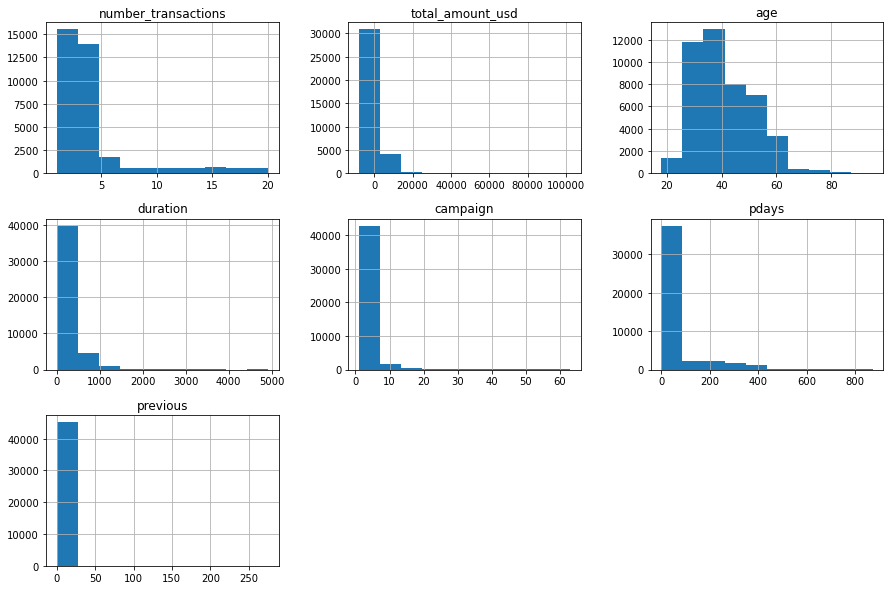

In [24]:
plt.rcParams["figure.figsize"] = (15,10)
numerical_features.hist();

In [22]:
categorical_columns=list(users_data.select_dtypes(['object']).columns)
print("# of categorical columns:", len(categorical_columns))

# of categorical columns: 7
